# 4.2 Bond behavior governed by plasticity
 
In the first part of this notebook, we rephrase the basic framework of
elasto-plastic models showing which conditions are used to find out how during yield 
to describe the material behavior, once it crosses the elastic limit.
Perfect plasticity with constant level of yielding stress is considered first.

In the second part, hardening variable is included which allows for to expand
the elastic range 

Define a bond-slip law governed yielding with hardening or softening.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

## Elastic, ideally plastic behavior
Assuming a constant yielding stress $\bar{\tau}$ and no hardening the possible paths along which the stress strain states can develop are depicted in Figure 1.
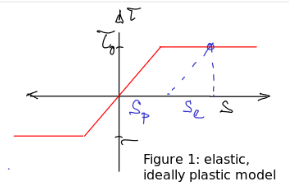

### Elastic behavior
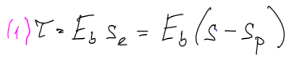

In [77]:
s_el = sp.symbols('s_\mathrm{el}')
E_b = sp.symbols('E_b', positive=True)
tau_ =  E_b * s_el # explain the naming - what is meant by underscore in the notebok
tau_

In [78]:
s, s_pl = sp.symbols('s, s_pl')
s_el_ = s - s_pl
tau_.subs(s_el, s_el_)

### Yield condition
Elastic domain is defined by the inequality equation
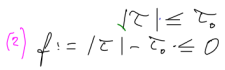

In [124]:
tau = sp.symbols(r'\tau')
tau_bar = sp.symbols(r'tau_0')
f_tau_ = sp.sqrt( tau * tau ) - tau_bar
f_tau_

**An idea?...**: what about to get rid of the unknown $s_\mathrm{pl}$ by substitute for the stress and then for the constitutive law and resolve the condition for $s_\mathrm{pl}$?

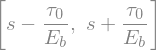

In [125]:
f_s = f_tau_.subs(tau, tau_).subs(s_el, s_el_)
s_pl_f0 = sp.solve(f_s, s_pl)
s_pl_f0

**... it's a dead end:** well, this is not of much help because once we substitute back into the constitutive equation $\tau = E_\mathrm{b}(s - s_\mathrm{pl}$ we just recover the fact that in inelastic regime, the stress must be equal to $\bar{\tau}$. But what we need is a relation between a control slip $s$ and the stress in the plastic regime.

In [126]:
tau_.subs(s_el, s_el_).subs(s_pl, s_pl_f0[1])

### Evolution equation:
Let us be more precise in defining the goal of the derivation: Inelastic behavior is path dependent. That means, during yielding, the value of stress does not depend only on the value of slip but also on the history of loading in a material point. Thus, we cannot get an explicit relation between the stress and slip. 

**But!**, we can try to find a mathematical compass that would tell us: "in which direction would the yielding proceed once it went through a known history of loading?". In other words, we want to establish the relation between stress and strain (or shear and slip) in a rate form, i.e. $\dot{\tau}$ and $\dot{s}$. Which is a short form of $\displaystyle{\frac{\partial \tau}{\partial t}}$ and $\displaystyle{\frac{\partial s}{\partial t}}$, respectively.

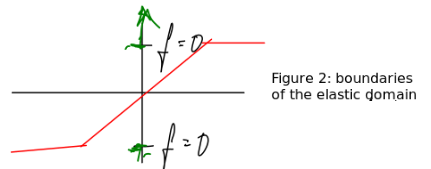

Regarding Figure 2 - what is the direction of flow/yielding when $\tau = \bar{\tau}$ and when $\tau = -\bar{\tau}$?

**Compass:** Let us postulate, that the amount of yielding can be mathematically controlled by a new nonnegative variable $\lambda$. The irreversible part of material response can be related to this scalar variable. The yielding is assumed to proceed in a normal direction with respect to the yield surface $f$
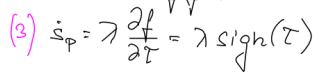

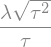

In [127]:
lambda_ = sp.symbols(r'\lambda', nonnegative=True)
dot_s_pl_ = lambda_ * f_tau_.diff(tau)
dot_s_pl_

**Relate increment of yielding to the increment of primary kinematic state variables:**
But how far do we go along the direction given by the gradient $\partial f / \partial \tau$? The amount of yielding 
is now controlled by a new unknown variable $\lambda$? 

The idea that helps to sort thins out and to mathematically distinguish the loading process into elastic and inelastic is provided by the **Kuhn-Tucker condition**
\begin{align}
  \lambda f = 0, \; \lambda > 0,\; f \le 0
\end{align}
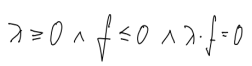

### Consistency condition
Now, if the process is yielding, then $f = 0$ and $\lambda \le 0$. Moreover, value of $f$ must remain zero during the whole yielding process. This means that the rate of the yield function, i.e. 
\begin{align}
\frac{ \mathrm{d} f}{\mathrm{d} t} = \dot{f} = 0
\end{align}
must be zero during the yielding process as well. This is the sought equation that can be used to resolve for $\lambda$ to determine the amount of yielding that corresponds to a prescribed rate of the control slip $\dot{s}$. 

To construct the rate of the yield condition let us recall that it depends on stress, which in turn depends on the control slip and on the plastic slip
\begin{align}
 f:= f( \tau (s, s_\mathrm{pl}) )
\end{align}
Thus, to obtain $\dot{f}$ we  can apply the chain rule 
\begin{align}
\dot{f} &= \frac{\mathrm{d} f}{\mathrm{d} t} =
\frac{\partial f}{\partial \tau} \frac{\mathrm{d} \tau}{\mathrm{d} t} 
= \frac{\partial f}{\partial \tau} 
\left(
\frac{\partial \tau}{\partial s} \frac{\mathrm{d} s}{\mathrm{d} t} +
\frac{\partial \tau}{\partial s_\mathrm{pl}} \frac{\mathrm{d} s_\mathrm{pl}}{\mathrm{d} t}
\right)
= \frac{\partial f}{\partial \tau} E_\mathrm{b}\left( \dot{s} - \dot{s}_\mathrm{pl} \right)
\end{align}

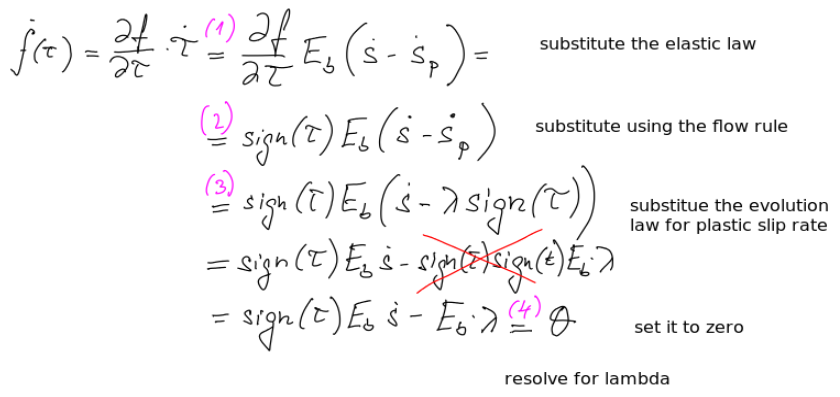

To realize this derivation in `sympy` let us transform the elastic relation from absolute values into the rate form
\begin{align}
\dot{\tau} = E_\mathrm{b}(\dot{s} - \dot{s}_\mathrm{pl})
\end{align}

In [128]:
dot_s, dot_s_pl = sp.symbols(r'\dot{s}, \dot{s}_\mathrm{pl}')
dot_tau_ = E_b * (dot_s - dot_s_pl)
dot_tau_

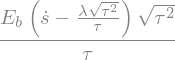

In [129]:
dot_f_ = f_tau_.diff(tau) * dot_tau_.subs(dot_s_pl, dot_s_pl_)
dot_f_

By setting this expression to zero and resolving for $\lambda$ we obtain 

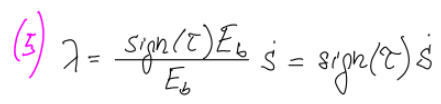

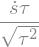

In [130]:
lambda_solved = sp.solve( dot_f_, lambda_)[0]
lambda_solved

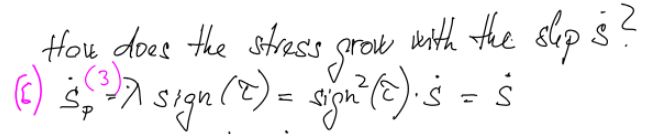

In [131]:
dot_s_pl_.subs(lambda_, lambda_solved)

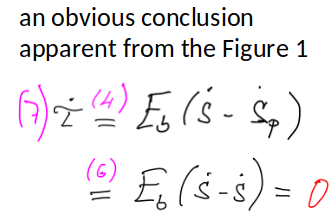

In [132]:
dot_tau_.subs(dot_s_pl, dot_s_pl_).subs(lambda_, lambda_solved)

[Convex mathematical programming literature]

## Hardening - elastic domain expands during yielding

### Yield condition

In [133]:
Z = sp.symbols('Z')
f_ = sp.sqrt((tau)*(tau)) - (tau_bar + Z)
f_

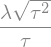

In [134]:
dot_s_pl_ = lambda_ * f_.diff(tau)
dot_s_pl_

### Hardening behavior
The hardening force $Z$ is an additional stress measure. It must be accompanied with a corresponding kinematic variable, a hardening slip and a material parameter, a hardening modulus
\begin{align}
 Z = K z
\end{align}
This relation will be need to solve for the consistency condition in the rate form. Thus, in `sympy` we shall introduce directly $\dot{Z} = K \dot{z}$

In [135]:
K = sp.symbols('K', positive=True )
z = sp.symbols(r'z')
Z_ = K * z
dot_z = sp.symbols(r'\dot{z}')
dot_Z_ = K * dot_z
dot_Z_

### Evolution equation
As in case of ideal plasticity, the yielding process is controlled by the plastic multiplier $\lambda$ which must be non-negative. Following the same arguments as above, the  hardening slip $z$ is assumed to evolve in a normal direction with respect to the yield surface, i.e. 
\begin{align}
\frac{\mathrm{d} f }{ \mathrm{d} Z} = -1
\end{align}
To let the hardening slip $\dot{z}$ grow in a positive direction we introduce the evolution equation as
\begin{align}
\dot{z} = - \lambda  \frac{\mathrm{d} f }{ \mathrm{d} Z} = \lambda
\end{align}
**Side remark:** The choice of the sign in the evolution equation might seem somewhat arbitrary but it is not. If a hardening stress variable, rd$Z$ in this case, appears in the yield condition with a negative sign. Therefore, we take the minus sign in the evolution equation to let the hardening slip grow positive consistently with the growth of $\lambda$.

In [136]:
dot_z_ = - lambda_ * f_.diff(Z)
dot_z_

### Consistency condition
The consistency condition is now depending on both $\dot{s}_\mathrm{pl}$ and $\dot{z}$

\begin{align}
 \dot{f} = 
     \frac{\partial f}{\partial \tau} \dot{\tau} 
+
     \frac{\partial f}{\partial Z} \dot{Z}
\end{align}

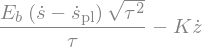

In [137]:
dot_f_ = f_.diff(tau) * dot_tau_ + f_.diff(Z) * dot_Z_
dot_f_

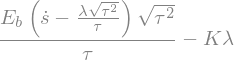

In [138]:
dot_f_lambda_ = dot_f_.subs(dot_s_pl, dot_s_pl_).subs(dot_z, dot_z_)
dot_f_lambda_

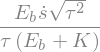

In [139]:
lambda_solved = sp.solve(dot_f_lambda_, lambda_)[0]
lambda_solved

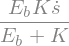

In [140]:
sp.simplify(dot_tau_.subs(dot_s_pl, dot_s_pl_).subs(lambda_, lambda_solved))

The relation between the rate of control slip and rate of stress is continuous. How to transform it into an algorithm?

## Numerical iterative solution

So far we expressed the change of the yield condition using the continuous rate. 
To move through an inelastic space of a material, let us now choose discrete values. We assume that we are in a state $n$ represented by known values of $s_{n}$ and $s^{\mathrm{pl}}_{n}$ and $z_n$.

Let us now prescribe the value of total control slip at the next step as
\begin{align}
s_{n+1} = s_n + \Delta s
\end{align}

How to determine the new state of the material represented by $s^\mathrm{pl}_{n+1}$ and $z_{n+1}$?

As we have learned from the continuous case, the consistency condition is the key to the identification of the plastic multiplier. Thus, given an inadmissible state $k$ with the consistency condition $f_k \neq 0$ not fulfilled let us introduce a linearized approximation of its change around the state $k$ to search for $k+1$ in the form

\begin{align}
 f_{k+1} &= f_{k} + \frac{\partial f}{\partial \lambda} \Delta \lambda
\end{align}

While in the continuous case, we required 
\begin{align}
 \dot{f}(\tau(s, s_\mathrm{pl}(\lambda), z(\lambda)) &= 0,
\end{align}
in the discrete case we transform this condition to
\begin{align}
 f_{k+1} = 0 \;\;\; \mathrm{for} \;\; k \rightarrow \infty 
\end{align}
In the linearized form of the yield condition we can transform it to a recurrent formula
\begin{align}
\left. \frac{\mathrm{d} f}{\mathrm{d} \lambda}\right|_k \Delta \lambda &=  -  f_k,
\hspace{1cm} f_k \rightarrow 0, k = 1\ldots\infty
\end{align}
In every iteration step the state variables $s_\mathrm{pl}$ and $z$ must be updated using the discrete evolution equations, i.e. 
\begin{align}
\lambda_{k+1} &= \lambda_k + \Delta \lambda \\
s^\mathrm{pl}_{k+1} &= s^\mathrm{pl}_k + \lambda_{k+1} 
\left. \frac{\partial f}{\partial \tau} \right|_k \\
z_{k+1} &= z_k + \lambda_{k+1} \left. \frac{\partial f}{\partial Z} \right|_k
\end{align}
a loop and simultaneous update of the state variable using the evolution equations we obtain an iterative scheme valid behind any plastic material model applied in finite-element codes. 

\begin{align}
\frac{\partial \dot{f}}{\partial \lambda}
&= 
\frac{\partial f}{\partial \tau} \frac{\partial \tau}{\partial s^{\mathrm{pl}}}
\frac{\partial \dot{s}^{\mathrm{pl}}} {\partial \lambda}
+
\frac{\partial f}{\partial \tau} \frac{\partial Z}{\partial z}
\frac{\partial \dot{z}}{\partial \lambda}
\end{align}
after substituting the evolution equations we obtain
\begin{align}
\frac{\partial \dot{f}}{\partial \lambda}
&= 
\frac{\partial f}{\partial \tau} \frac{\partial \tau}{\partial s^{\mathrm{pl}}}
\frac{\partial f}{\partial \tau} -
\frac{\partial f}{\partial \tau} \frac{\partial Z}{\partial z}
\frac{\partial f}{\partial \tau}
\end{align}
which can be expressed as
\begin{align}
\frac{\partial \dot{f}}{\partial \lambda}
&= -
\left( \frac{\partial f}{\partial \tau} \right)^2 E_\mathrm{b} -
\left( \frac{\partial f}{\partial Z} \right)^2 K
\end{align}

Thus, to evaluate this iterative scheme we need the functions
<table style="width:50%">
<tr>
<th>Symbol</th>
<th>Sympy expression</th>
<th>Python function</th>
</tr>
<tr>
<td>$\tau(s, s^{\mathrm{pl}}_k) $  
</td>
<td>tau_</td>
<td>get_tau</td>
</tr>
<tr>
<td>$Z(z)$  
</td>
<td>Z_</td>
<td>get_Z</td>
</tr>
<tr>
<td>$ f(\tau, Z)$</td>
<td>f_</td>
<td>get_f</td>
</tr>
<tr>
<td>
$\displaystyle{\frac{\partial f}{\partial \tau}}(\tau, Z)$
    </td>
<td>df_dtau_</td>
<td>get_df_dtau</td>
</tr>
<tr>
<td>
$\displaystyle{\frac{\partial f}{\partial Z}}(\tau, Z)$
    </td>
<td>df_dZ_</td>
<td>get_df_dZ</td>
</tr>
</table>

In [147]:
get_tau = sp.lambdify((s, s_pl),tau_.subs(s_el,s_el_))
get_Z = sp.lambdify(z, Z_)
get_f = sp.lambdify((tau, Z), f_)
get_df_dtau = sp.lambdify((tau, Z), f_.diff(tau))
get_df_dZ = sp.lambdify((tau, Z), f_.diff(Z))

In [ ]:
def get_f_df(s_n1, s_pl_k, z_k):
    tau = get_tau(s_n1, s_pl_k)
    Z = get_Z(z_k)
    f_k = get_f(tau, Z)